In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
Bsk = 1e5
#Gsk = 60e6 #Pa
n = 0.427
f = np.linspace(0,100000, num=30000) #frequency Hz
omega = 2*np.pi*f # angular frequncy
rho_g = 2630 # grain density kg/m3
rho_f = 1000 # fluid density kg/m3
nu = 0.001 # Pa.s water viscosity at room temperature 10e-3
n = 0.424  # porosity
alpha = 1.67# tortuosity factor
kh=0.012e-2 #m/s hydraulic conductivity
a = 0.12e-4# pore size parameter m
a2 = a*a
rho_mix= (1-n)*rho_g + n*rho_f
g = 9.81 #m/s2 gravity
K = nu*kh/rho_f/g   #K = 1e-11 # absolute hydraulic conductivity m2  (1darcy=10e-12)
# hydraulic conductivity m/s  #kh = g*rho_f*K/nu

In [3]:
#characteristic frequency
fc=n*g/2/np.pi/kh
fc

5516.628637451276

In [4]:
path = 'C:/Users/birtai/AnacondaProjects/AnacondaProjects/RC-Testing'
filename = '/RC2_BE.csv'
filepath = path + filename
filepath

'C:/Users/birtai/AnacondaProjects/AnacondaProjects/RC-Testing/RC2_BE.csv'

In [24]:
data = pd.read_csv(filepath, sep=',', delimiter=None, 
                   names = ['TestNr', 'Time', 'sigma_v', 'sigma_h', 'deltaHeight', 'dV', 
                            'travel time', 'sigma_oct', 'Vs', 'Gmax', 'frequency'])
data

,TestNr,Time,sigma_v,sigma_h,deltaHeight,dV,travel time,sigma_oct,Vs,Gmax,frequency
0,1,120,50.0,50.0,0.0010,0.10,0.4880,50.0,209,89.1,HF
1,2,984,100.0,50.0,0.0050,0.40,0.4140,66.7,247,123.7,HF
2,3,120,100.0,100.0,0.0032,0.75,0.3700,100.0,276,155.1,HF
3,4,120,200.0,100.0,0.0080,1.10,0.3340,133.3,306,190.3,HF
4,5,1157,200.0,200.0,0.0050,1.60,0.3040,200.0,336.0,230.1,HF
5,6,130,400.0,200.0,0.0130,2.20,0.2925,266.7,349.0,248.4,HF
6,7,1250,400.0,400.0,0.0118,2.60,0.2768,400.0,369,277.7,HF
7,8,120,50.0,50.0,0.0010,0.10,0.5380,50.0,190,73.3,LF
8,9,984,100.0,50.0,0.0050,0.40,0.4740,66.7,216,94.4,LF
9,10,120,100.0,100.0,0.0032,0.75,0.4320,100.0,237,113.8,LF


In [61]:
#data.frequency[10]= 0
data['numGmax'] = pd.to_numeric(data['Gmax'], errors='coerce')
numFreq = {'HF': 1e4,"LF" :100}
data['frequency'] = data['frequency'].str.replace(' ', '')
#data['numFreq'] = data['frequency'].apply(numFreq.get).astype(float)
data['numFreq'] = data['frequency'].replace(numFreq)
data['numVs'] = pd.to_numeric(data['Vs'], errors = 'coerce')
data['density'] = data.numGmax*1e6/data.numVs/data.numVs
data
#data.numFreq[10] = 0


,TestNr,Time,sigma_v,sigma_h,deltaHeight,dV,travel time,sigma_oct,Vs,Gmax,frequency,numGmax,numFreq,numVs,density
0,1,120,50.0,50.0,0.0010,0.10,0.4880,50.0,209,89.1,HF,89.1,10000.0,209.0,2039.788466
1,2,984,100.0,50.0,0.0050,0.40,0.4140,66.7,247,123.7,HF,123.7,10000.0,247.0,2027.569703
2,3,120,100.0,100.0,0.0032,0.75,0.3700,100.0,276,155.1,HF,155.1,10000.0,276.0,2036.074354
3,4,120,200.0,100.0,0.0080,1.10,0.3340,133.3,306,190.3,HF,190.3,10000.0,306.0,2032.337990
4,5,1157,200.0,200.0,0.0050,1.60,0.3040,200.0,336.0,230.1,HF,230.1,10000.0,336.0,2038.159014
5,6,130,400.0,200.0,0.0130,2.20,0.2925,266.7,349.0,248.4,HF,248.4,10000.0,349.0,2039.392123
6,7,1250,400.0,400.0,0.0118,2.60,0.2768,400.0,369,277.7,HF,277.7,10000.0,369.0,2039.497360
7,8,120,50.0,50.0,0.0010,0.10,0.5380,50.0,190,73.3,LF,73.3,100.0,190.0,2030.470914
8,9,984,100.0,50.0,0.0050,0.40,0.4740,66.7,216,94.4,LF,94.4,100.0,216.0,2023.319616
9,10,120,100.0,100.0,0.0032,0.75,0.4320,100.0,237,113.8,LF,113.8,100.0,237.0,2026.028592


In [18]:
data3= pd.DataFrame()
data3['Vs_HF'] = data.numVs[0:7]
data3['Vs_LF'] = np.array(data.numVs[7:14])
array3= np.array(data3)
array_Freq = np.array([10000, 100])
array3;

<IPython.core.display.Javascript object>


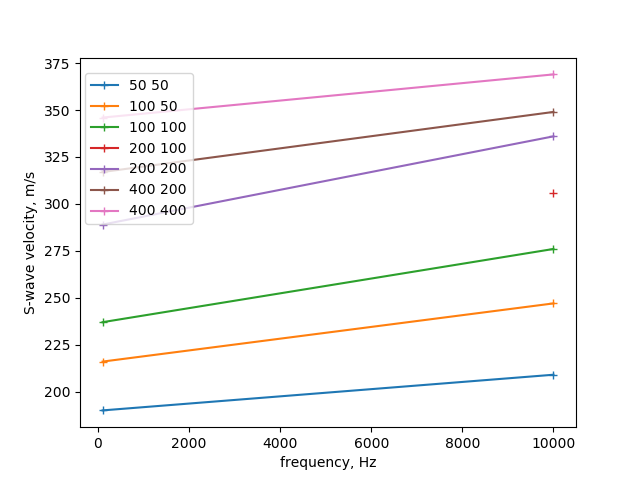

In [34]:
%matplotlib notebook
fig = plt.figure()
ax = plt.subplot(111)
for i in range(0,array3.shape[0]):
    ax.plot(array_Freq, array3[i], '-+')
plt.xlabel('frequency, Hz')
plt.ylabel('S-wave velocity, m/s')
#legend
plt.legend(('50 50', '100 50', '100 100', '200 100', '200 200', '400 200', '400 400'), loc=(0.01, 0.55))#, 'upper left')#) #, shadow=True, )

In [63]:
file_G = '/RC2_G.csv'
filepath_G = path + file_G
data_G = pd.read_csv(filepath_G, names = ['Time', 'sigma_v', 'sigma_h','sigma_oct', 'G_RC', 'D_RC', 'gamma_RC'])
data_G["Vs"]= np.sqrt(data_G.G_RC*1e6/data.density)
data_G

,Time,sigma_v,sigma_h,sigma_oct,G_RC,D_RC,gamma_RC,Vs
0,120,50,50,50.000000,77.687956,0.601784,0.00013,195.157067
1,984,100,50,66.666667,100.124995,0.490293,0.00012,222.220110
2,120,100,100,100.000000,121.018709,0.569583,0.00012,243.797609
3,120,200,100,133.333333,147.990345,0.610753,0.00013,269.847702
4,1157,200,200,200.000000,174.463952,0.567320,0.00012,292.572714
5,130,400,200,266.666667,206.597179,0.581771,0.00011,318.281814
6,1250,400,400,400.000000,230.918368,0.605953,0.00001,336.486516


In [10]:
Gsk = data_G.G_RC*1e6

In [11]:
#Gsk = data.numGmax[7:14]*1e6
#Gsk

In [12]:
#%matplotlib notebook
#fig = plt.figure()
#ax = plt.subplot(111)
#ax.plot(Gsk, '*b')
#ax.plot(Vs, 'r')

In [13]:
dseta = np.sqrt(omega*a2*rho_f/nu)
Bes_arg = dseta*np.exp(-1j*np.pi/4) #argument der Besselfunktion in T
J1=sp.jv(1,Bes_arg) # Besselfunktion 1. Ordnung
J0=sp.jv(0,Bes_arg) # Besselfunktion 0. Ordnung
Jdiv=J1/J0
T = np.exp(1j*3*np.pi/4)*Jdiv
F1 = dseta*T/4
F2 = dseta*T/4/(1+2j*T/dseta)
denom = (1+2j*T/dseta)
q1 = alpha*rho_f/n
q2 = 1j*nu*F2/omega/K
q = q1 - q2

C:\Users\birtai\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in true_divide
C:\Users\birtai\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: invalid value encountered in true_divide


In [14]:
Vs2 = np.array([g*q/(rho_mix*q - rho_f*rho_f) for g in Gsk])
#Vs2 = Gsk*q/(rho_mix*q - rho_f*rho_f)
Vs = np.sqrt(Vs2)

C:\Users\birtai\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


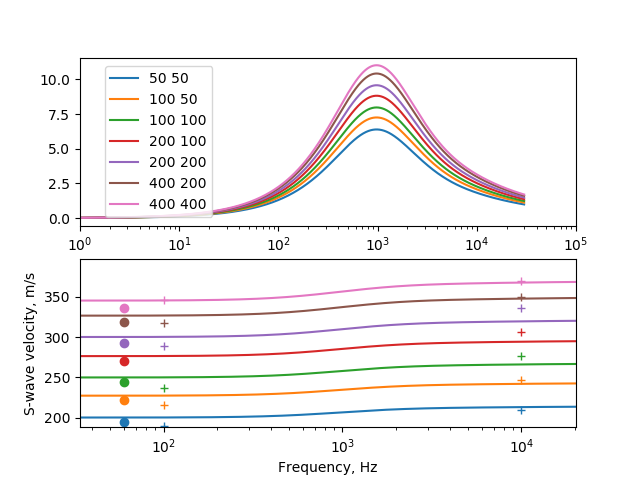

In [68]:
%matplotlib notebook
fig = plt.figure()
ax = plt.subplot(211)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:Vs.shape[0]]

#for i, color, style in zip(range(5), colors, styles):
#plt.plot(x, np.sin(x) - .1 * i, c=color, ls=style)
for i, color in zip(range(Vs.shape[0]),colors):
    ax.semilogx(Vs[i].imag, c=color)
plt.xlim((0,100000))

ax2= plt.subplot(212)
for i,color in zip(range(Vs.shape[0]), colors):
    ax2.semilogx(Vs[i].real, c=color)

#ax2.semilogx(data.numFreq, data.numVs, '-*r')
for i,color in zip(range(array3.shape[0]), colors):
    ax2.plot(array_Freq, array3[i], '+', c=color)
    ax2.plot(60, data_G.Vs[i], 'o', c=color)
plt.xlim(0,100000);
plt.ylim(180,400);

plt.legend(('50 50', '100 50', '100 100', '200 100', '200 200', '400 200', '400 400'), 
           loc=(0.05, 1.25))#, 'upper left')#) #, shadow=True, )
plt.xlabel('Frequency, Hz')
plt.ylabel('S-wave velocity, m/s')